# <font color="blue">Project1: Virtual Makeup </font>
We have already seen interesting applications of facial features and landmarks such as aging, beardify, face swap etc.

In this project, you will build features for a Virtual Makeup application! Given below are a few features that are required to be built in the application. 

1. Apply Lipstick
1. Apply Blush
1. Apply Eye-Liners or Eye-Lashes
1. Apply Glasses
1. Apply Eye Color ( Lens Color)
1. Apply Hat/Cap
1. Apply Ear-Rings
1. Change Hair Color

### <font color="green">Your Task</font>
Implement any 2 features from the list above

We have provided a sample image. You can use your own image for experimentation as well as come up with other interesting features.

### <font color="green">Submission</font>
Once you are done, you have to create a video, explaining the main part of the code, upload it to youtube or any other video sharing service and provide the link in the form given in the submission section of the course.

### <font color="green">Marks Distribution</font>

1. Feature 1: 35 marks
1. Video for Feature 1: 15 marks
1. Feature 2: 35 marks
1. Video for Feature 2: 15 marks

In [1]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load faceBlendCommon file to use common functions.

In [2]:
import faceBlendCommon as fbc

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# <font color="blue">Load landmark detector</font>
We have provided code for loading the model for landmark detector.

In [4]:
# Landmark model location
PREDICTOR_PATH =  "shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# <font color="blue">Read Image</font>
We load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib.

### <font color="red">You can also use any other image.</font> 

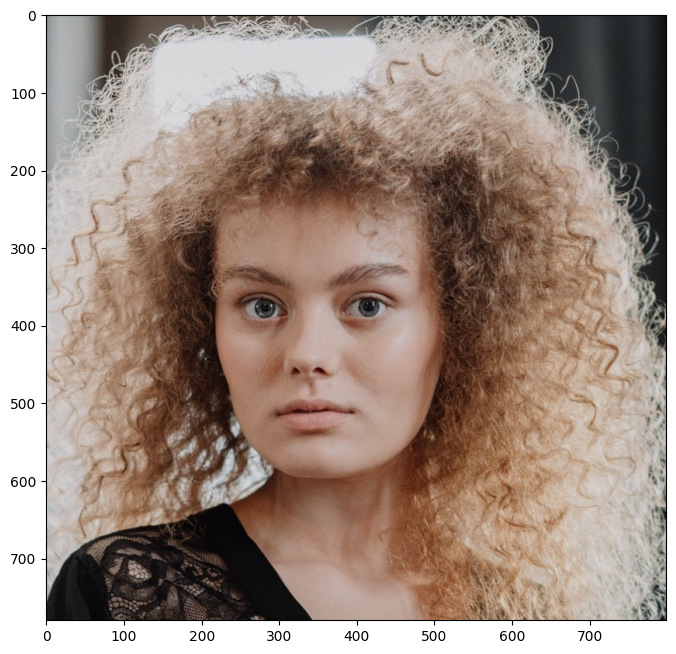

In [5]:
im = cv2.imread("girl-no-makeup.jpg")

imDlib = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(imDlib)

# <font color="blue">Calculate Landmarks</font>
We are providing code for calculating the landmarks in this section. So that you can focus on the feature implementation.

In [6]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, imDlib)
print(points)

[(216, 375), (217, 411), (224, 446), (233, 480), (242, 515), (258, 547), (283, 574), (313, 594), (350, 600), (390, 595), (430, 579), (464, 557), (488, 524), (501, 487), (508, 447), (513, 408), (514, 369), (223, 343), (241, 326), (268, 325), (293, 333), (317, 346), (362, 345), (389, 331), (418, 321), (449, 321), (474, 336), (338, 374), (337, 397), (335, 419), (333, 442), (315, 465), (326, 468), (337, 471), (351, 468), (364, 465), (252, 378), (268, 368), (289, 369), (307, 385), (287, 390), (266, 389), (382, 384), (401, 369), (423, 367), (441, 375), (426, 387), (404, 389), (293, 517), (310, 503), (327, 496), (340, 500), (353, 496), (376, 502), (401, 514), (377, 528), (356, 535), (341, 536), (326, 535), (310, 530), (303, 516), (327, 512), (340, 512), (354, 511), (391, 513), (354, 512), (341, 513), (327, 513)]


# <font color="blue">TODO</font>
You have to implement 2 features from the above list. You can also think about a new feature and implement. 


# <font color="blue">Feature 1</font>
Write code for the first feature you want to implement from the above list. Display the output image after writing the code.

# <font color="blue">Feature 2</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

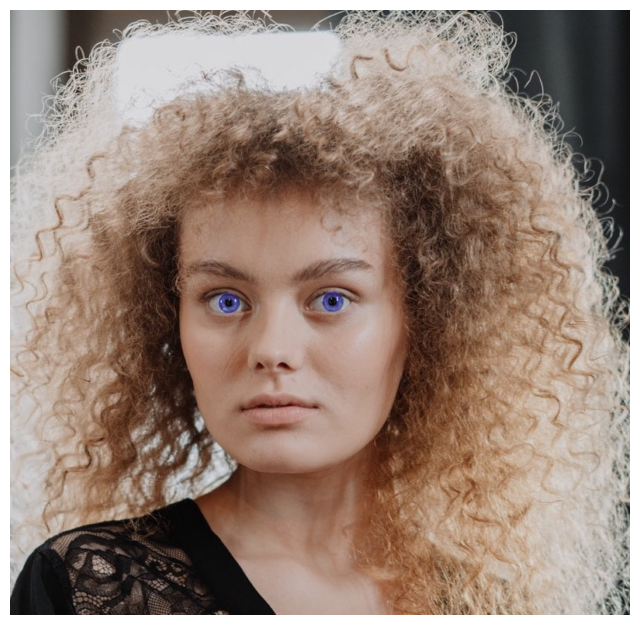

In [36]:
# import cv2
# import dlib
# import numpy as np
# from matplotlib import pyplot as plt
# from pathlib import Path

# Since we have the landmark predictor file now, we can proceed.

# Load the uploaded image
# image_path = 'input_image.png'
# image = cv2.imread(image_path)

# Initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
# detector = dlib.get_frontal_face_detector()
# predictor_path = 'shape_predictor_68_face_landmarks.dat'
# predictor = dlib.shape_predictor(predictor_path)

# Function to get the coordinates from the dlib shape object
def shape_to_np(shape, dtype="int"):
    # np.
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords

# Detect faces in the grayscale image
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
rects = faceDetector(gray, 1)

# If no faces are detected, we cannot proceed.
if not rects:
    raise ValueError("No faces detected in the image.")

# Assume only one face is detected and get the facial landmarks
shape = landmarkDetector(gray, rects[0])
points = shape_to_np(shape)

# Mask for the colored lens area
lens_mask = np.zeros_like(im)

# Defining the landmark points for each eye (iris area, excluding the pupil)

left_iris_points = points[36:41]
right_iris_points = points[42:47]

def get_iris_center_and_radius(iris_points):
    # Exclude the upper eyelid by considering only the lower half of the points
    iris_points_lower = iris_points[0:5]  # position of lens color
    center = np.mean(iris_points_lower, axis=0).astype("int")
    radius = min([np.linalg.norm(np.array(p) - center) for p in iris_points_lower]).astype(int)
    return center, radius


# Usage of get_iris_center_and_radius function remains the same

left_eye_center, left_iris_radius = get_iris_center_and_radius(left_iris_points)
right_eye_center, right_iris_radius = get_iris_center_and_radius(right_iris_points)

# Adjust the iris radius to avoid coloring the pupil
iris_reduction_factor = 1.2 # size of lens color
left_iris_radius = int(left_iris_radius * iris_reduction_factor)
right_iris_radius = int(right_iris_radius * iris_reduction_factor)

# Define the new color for the lens area
# blue_lens_color = (255, 165, 0)  # This is actually orange, but keeping it as per the initial code
# green_lens_color = (0, 255, 165)
brown_lens_color = (165, 42, 42)
# Draw the circles on the mask for the colored lens area (iris)
cv2.circle(lens_mask, tuple(left_eye_center), left_iris_radius, brown_lens_color, -1)
cv2.circle(lens_mask, tuple(right_eye_center), right_iris_radius, brown_lens_color, -1)

# Create a mask for the pupil area (using a smaller radius)
pupil_mask = np.zeros_like(im)
pupil_reduction_factor = 0.4
left_pupil_radius = int(left_iris_radius * pupil_reduction_factor)
right_pupil_radius = int(right_iris_radius * pupil_reduction_factor)
cv2.circle(pupil_mask, tuple(left_eye_center), left_pupil_radius, (255, 255, 255), -1)
cv2.circle(pupil_mask, tuple(right_eye_center), right_pupil_radius, (255, 255, 255), -1)

# Subtract the pupil mask from the lens mask to avoid coloring the pupil
lens_mask = cv2.subtract(lens_mask, pupil_mask)

# Blend the original image and the mask to change the lens color
im_with_lens_color = cv2.addWeighted(im, 1, lens_mask, 0.5, 0)

# Convert the final image from BGR to RGB
im_with_lens_color_rgb = cv2.cvtColor(im_with_lens_color, cv2.COLOR_BGR2RGB)

# Save the result
# result_path = Path('image_with_green_iris.png')
# cv2.imwrite(str(result_path), cv2.cvtColor(im_with_lens_color, cv2.COLOR_RGB2BGR))

# Display the result
plt.imshow(im_with_lens_color_rgb)
plt.axis('off')  # Hide the axis
plt.show()




# Lipstick

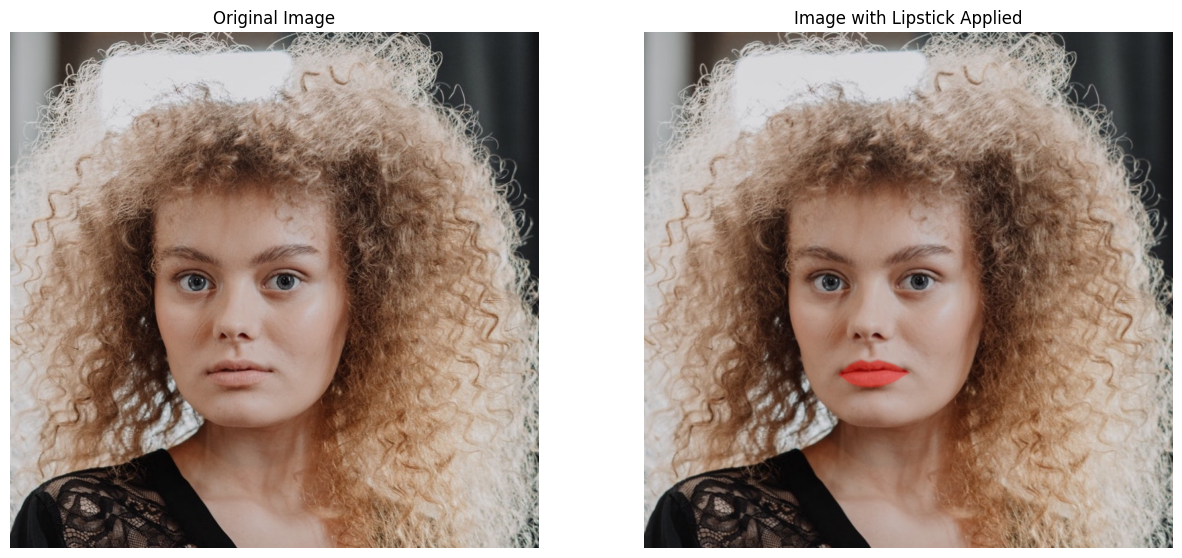

In [8]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import faceBlendCommon as fbc

# Define a function to apply lipstick with a pattern
# pattern_intensity is the intensity of the pattern. Which means how much the pattern should be visible in the final image.So, if 
# pattern_intensity is 0, the pattern will not be visible at all. If pattern_intensity is 1, the pattern will be fully visible.
def applyLipstickWithPattern(image, points, color=(255, 0, 0), intensity=0.5, pattern_intensity=0.75):
    """
    Apply lipstick with a pattern to the lips.
    
    Parameters:
    - image: The original image.
    - points: The points on the lips.
    - color: The lipstick color.
    - intensity: The intensity of the lipstick color.
    - pattern_intensity: The intensity of the lipstick pattern.
    
    Returns:
    - The image with lipstick applied.
    """
    # Points of the outer and inner lips
    lipsOuterPoints = points[48:60]
    lipsInnerPoints = points[60:68]

    # Create a mask for the lips and apply the lipstick color
    mask = image.copy()
    # purpose of cv2.fillPoly is to fill the area bounded by the points with the specified color
    cv2.fillPoly(mask, [np.array(lipsOuterPoints, dtype=np.int32)], color)
    cv2.fillPoly(mask, [np.array(lipsInnerPoints, dtype=np.int32)], color)

    #adjust the lips in the mask
    mask = cv2.GaussianBlur(mask, (3, 3), 10) # Blur the mask to make the lips smoother
    
    # Blend the patterned mask with the original image
    # 0 below means that the mask is fully transparent and 1 means that the mask is fully opaque
    patterned_lips = cv2.addWeighted(image, 1 - pattern_intensity, mask, pattern_intensity, 0) # Blend the mask with the image

    # Blend the lips with the image 
    # 0 below means that the image is fully transparent and 1 means that the image is fully opaque
    return cv2.addWeighted(image, 1 - intensity, patterned_lips, intensity, 0)

# Read the image
im = cv2.imread("girl-no-makeup.jpg")
imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

#Get landmarks
points = fbc.getLandmarks(faceDetector, landmarkDetector, imDlib)

# Check if landmarks were detected
if len(points) > 0:
    # Apply lipstick with pattern
    lipstickColor = (255, 0, 0)  # Red color in RGB format
    intensity = 0.5 # Adjust the intensity of the lipstick color
    pattern_intensity = 0.75 # Adjust the intensity of the lipstick pattern
    outputImage = applyLipstickWithPattern(imDlib, points, lipstickColor, intensity, pattern_intensity)
    
    # Display the output
    fig, axes = plt.subplots(1, 2, figsize=(15, 10)) # 
    
    # Original Image
    axes[0].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Image with lipstick applied
    axes[1].imshow(outputImage)
    axes[1].set_title('Image with Lipstick Applied')
    axes[1].axis('off')
    
    plt.show()
else:
    print("No face detected.")

# Webcam: Lipstick

In [9]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import faceBlendCommon as fbc

# Define a function to apply lipstick with a pattern
def applyLipstickWithPattern(image, points, color=(255, 0, 0), intensity=0.5, pattern_intensity=0.75):
    """
    Apply lipstick with a pattern to the lips.
    
    Parameters:
    - image: The original image.
    - points: The points on the lips.
    - color: The lipstick color.
    - intensity: The intensity of the lipstick color.
    - pattern_intensity: The intensity of the lipstick pattern.
    
    Returns:
    - The image with lipstick applied.
    """
    # Points of the outer and inner lips
    lipsOuterPoints = points[48:60]
    lipsInnerPoints = points[60:68]

    # Create a mask for the lips and apply the lipstick color
    mask = image.copy()
    cv2.fillPoly(mask, [np.array(lipsOuterPoints, dtype=np.int32)], color)
    cv2.fillPoly(mask, [np.array(lipsInnerPoints, dtype=np.int32)], color)

    # Adjust the lips in the mask
    mask = cv2.GaussianBlur(mask, (15, 15), 10)
    
    # Blend the patterned mask with the original image
    patterned_lips = cv2.addWeighted(image, 1 - pattern_intensity, mask, pattern_intensity, 0)

    # Blend the lips with the image
    return cv2.addWeighted(image, 1 - intensity, patterned_lips, intensity, 0)

# Initialize video capture
cap = cv2.VideoCapture(0)

# Initialize face detector and landmark detector
faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Convert frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Get landmarks
    points = fbc.getLandmarks(faceDetector, landmarkDetector, frame_rgb)
    
    # Check if landmarks were detected
    if len(points) > 0:
        # Apply lipstick with pattern
        lipstickColor = (255, 0, 0)  # Red color in RGB format
        intensity = 0.5  # Adjust the intensity of the lipstick color
        pattern_intensity = 0.75  # Adjust the intensity of the lipstick pattern
        output_frame = applyLipstickWithPattern(frame_rgb, points, lipstickColor, intensity, pattern_intensity)
        
        # Display the output frame
        cv2.imshow('Lipstick Video', cv2.cvtColor(output_frame, cv2.COLOR_RGB2BGR))
    else:
        cv2.imshow('Lipstick Video', frame)
    
    # Check for the 'q' key to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()

# Webcam: Eye Lens

In [10]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

# Load the facial landmark predictor
predictor_path = 'shape_predictor_68_face_landmarks.dat'
landmarkDetector = dlib.shape_predictor(predictor_path)

# Initialize dlib's face detector (HOG-based)
faceDetector = dlib.get_frontal_face_detector()

# Function to get the coordinates from the dlib shape object
def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords

def get_iris_center_and_radius(iris_points):
    iris_points_lower = iris_points[0:5]  
    center = np.mean(iris_points_lower, axis=0).astype("int")
    radius = min([np.linalg.norm(np.array(p) - center) for p in iris_points_lower]).astype(int)
    return center, radius

# Function to apply lens color modification to the detected face
def apply_lens_color(frame, shape):
    points = shape_to_np(shape)
    left_iris_points = points[36:41]
    right_iris_points = points[42:47]
    left_eye_center, left_iris_radius = get_iris_center_and_radius(left_iris_points)
    right_eye_center, right_iris_radius = get_iris_center_and_radius(right_iris_points)
    iris_reduction_factor = 1.25
    left_iris_radius = int(left_iris_radius * iris_reduction_factor)
    right_iris_radius = int(right_iris_radius * iris_reduction_factor)
    brown_lens_color = (165, 42, 42)
    lens_mask = np.zeros_like(frame)
    cv2.circle(lens_mask, tuple(left_eye_center), left_iris_radius, brown_lens_color, -1)
    cv2.circle(lens_mask, tuple(right_eye_center), right_iris_radius, brown_lens_color, -1)
    pupil_mask = np.zeros_like(frame)
    pupil_reduction_factor = 0.4
    left_pupil_radius = int(left_iris_radius * pupil_reduction_factor)
    right_pupil_radius = int(right_iris_radius * pupil_reduction_factor)
    cv2.circle(pupil_mask, tuple(left_eye_center), left_pupil_radius, (255, 255, 255), -1)
    cv2.circle(pupil_mask, tuple(right_eye_center), right_pupil_radius, (255, 255, 255), -1)
    lens_mask = cv2.subtract(lens_mask, pupil_mask)
    frame_with_lens_color = cv2.addWeighted(frame, 1, lens_mask, 0.5, 0)
    return frame_with_lens_color

# Open the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale frame
    rects = faceDetector(gray, 1)
    
    # Apply lens color modification to each detected face
    for rect in rects:
        shape = landmarkDetector(gray, rect)
        frame = apply_lens_color(frame, shape)
    
    # Display the resulting frame
    cv2.imshow('Webcam with Lens Color Modification', frame)
    
    # Exit loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
